<a href="https://colab.research.google.com/github/nirajmg/networkLB/blob/main/nlb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [2]:
wrr = pd.read_csv('wrr.csv',names=['ip', 'response_time', 'algo_time'])
rr = pd.read_csv('rr.csv',names=['ip', 'response_time', 'algo_time'])
lrt = pd.read_csv('lrt.csv',names=['ip', 'response_time', 'algo_time'])
iph = pd.read_csv('iph.csv',names=['ip', 'response_time', 'algo_time'])

In [3]:
for df in [wrr,rr,lrt,iph]:
  df['response_time'] = df['response_time'].apply(lambda x: float(x[:-2]))
  df['algo_time'] = df['algo_time'].apply(lambda x: float(x[:-2]))

In [4]:
for df in [wrr,rr,lrt,iph]:
  print(f'Number of successful calls for 1000 requests {len(df.index)}')

Number of successful calls for 1000 requests 967
Number of successful calls for 1000 requests 1000
Number of successful calls for 1000 requests 1000
Number of successful calls for 1000 requests 998


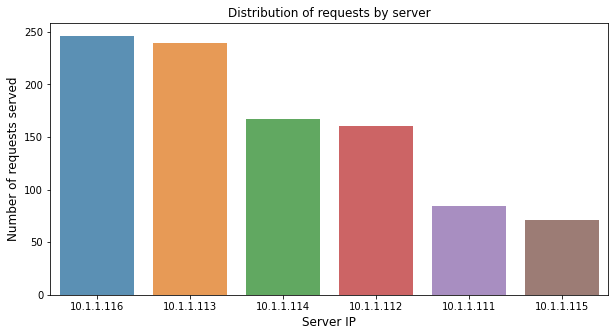

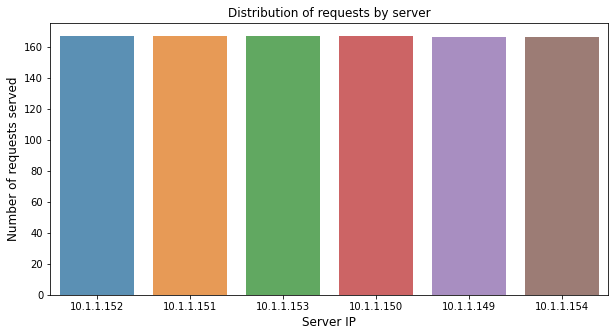

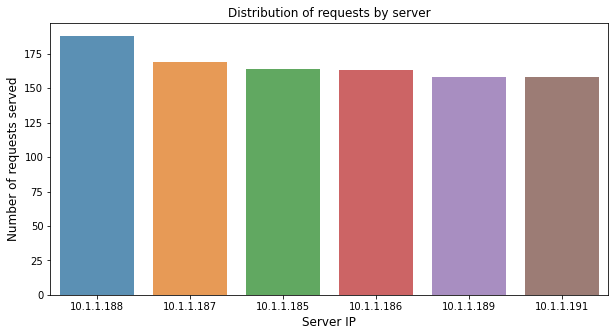

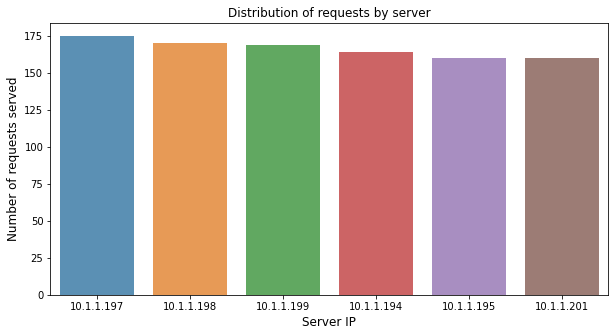

In [5]:
for df in [wrr,rr,lrt,iph]:
  ip_count  = df['ip'].value_counts()
  plt.figure(figsize=(10,5))
  sns.barplot(ip_count.index, ip_count.values, alpha=0.8)
  plt.title('Distribution of requests by server')
  plt.ylabel('Number of requests served', fontsize=12)
  plt.xlabel('Server IP', fontsize=12)
  plt.show()



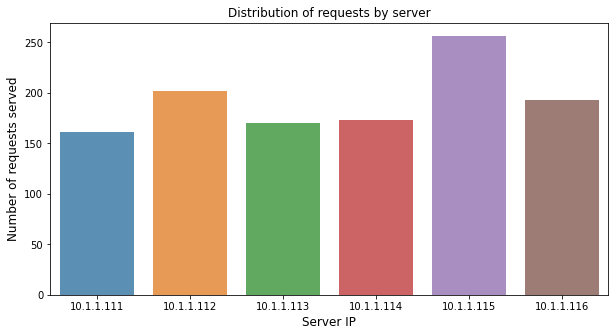

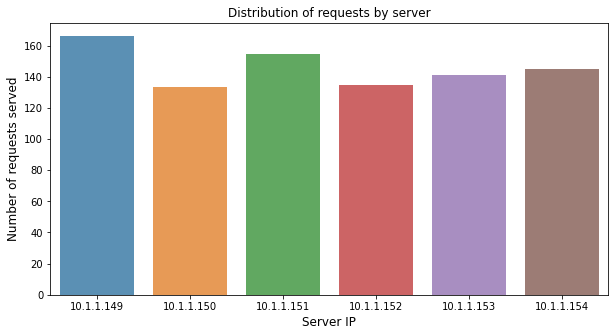

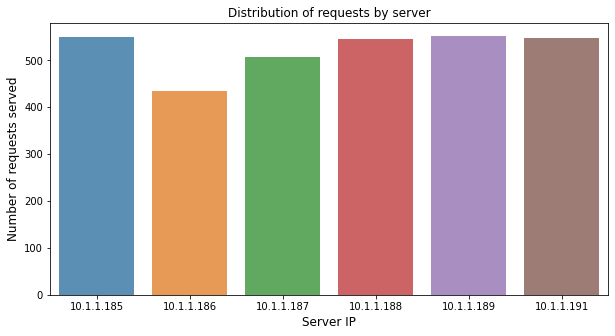

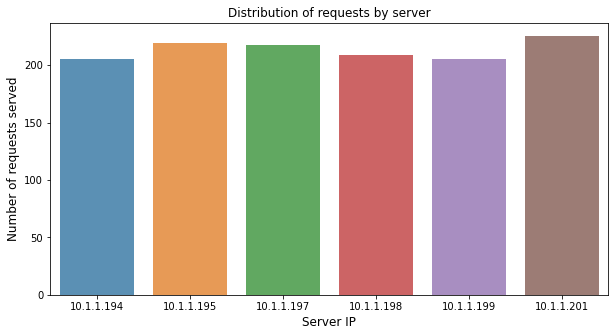

In [6]:
for df in [wrr,rr,lrt,iph]:
  avg_time = df.groupby('ip').mean().reset_index()
  plt.figure(figsize=(10,5))
  sns.barplot(avg_time.ip, avg_time.response_time, alpha=0.8)
  plt.title('Distribution of requests by server')
  plt.ylabel('Number of requests served', fontsize=12)
  plt.xlabel('Server IP', fontsize=12)
  plt.show()

In [ ]:
avg_time

,ip,response_time,algo_time
0,10.1.1.111,160.983697,122.410394
1,10.1.1.112,201.857764,120.933227
2,10.1.1.113,170.561281,131.304513
3,10.1.1.114,173.173894,111.300959
4,10.1.1.115,256.318230,132.900481
5,10.1.1.116,192.811449,114.600870
